In [1]:
from IPython.display import IFrame
IFrame(src='http://scikit-learn.org/stable/', width=1000, height=600)

In [2]:
from IPython.display import IFrame
IFrame(src='https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf', width=1000, height=600)

In [3]:
from IPython.display import IFrame
IFrame(src='http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3', width=1000, height=600)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Simple Linear Regression

In [5]:
file_path = 'student_scores.csv'
data = pd.read_csv(file_path)

In [6]:
data.shape

(25, 2)

In [7]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


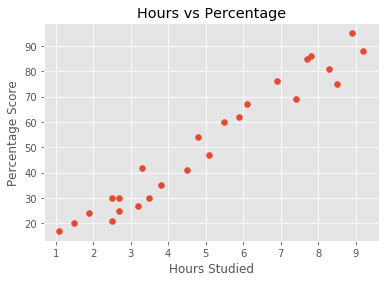

In [9]:
plt.style.use('ggplot')
plt.scatter(data.Hours, data.Scores)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Split columns to attributes and labels

In [10]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

### Split data to train and test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

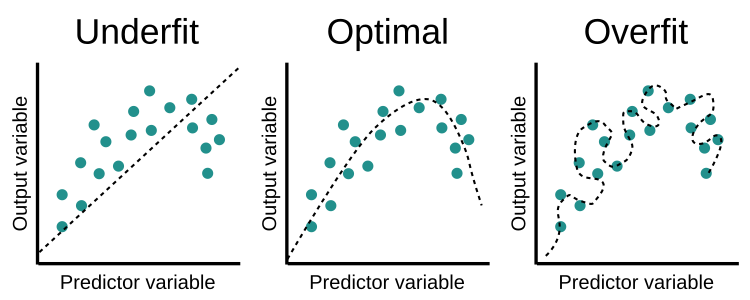

In [12]:
from IPython.display import Image
Image(filename='fitting.png')

### Training the model

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(regressor.intercept_)

2.018160041434662


In [15]:
print(regressor.coef_)

[9.91065648]


In [16]:
y_pred = regressor.predict(X_test)

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


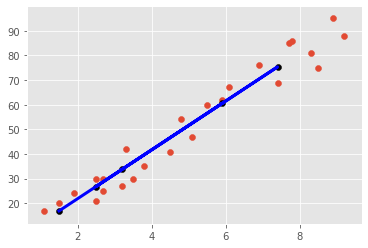

In [19]:
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.scatter(data.Hours, data.Scores)
plt.scatter(X_test, y_pred, color='black')

## Multiple Linear Regression

In [20]:
file_path = 'petrol_consumption.csv'
data = pd.read_csv(file_path)

In [21]:
data.shape

(48, 5)

In [22]:
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [23]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


### Split columns to attributes and labels

In [24]:
X = data[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = data['Petrol_Consumption']

In [25]:
# X = data.iloc[:, :-1].values
# y = data.iloc[:, 1].values

### Split data to train and test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the model

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
regressor.coef_

array([-4.00166602e+01, -6.54126674e-02, -4.74073380e-03,  1.34186212e+03])

In [29]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [30]:
y_pred = regressor.predict(X_test)

In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [32]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.82224747896471
Mean Squared Error: 4666.344787588363
Root Mean Squared Error: 68.3106491521517
